In [1]:
## KNN and Naive Bayes on dataset and begin with KNN

In [12]:
import pandas as pd
import numpy as np
import math
from sklearn.neighbors import KNeighborsClassifier as KNNC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn import decomposition, preprocessing, naive_bayes, datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = datasets.load_iris()

In [8]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')


# Data preprocessing

In [10]:
# removing duplicates
## dropping duplicates
dup = df[df.duplicated()]
df.drop_duplicates()
dup.shape

(1, 4)

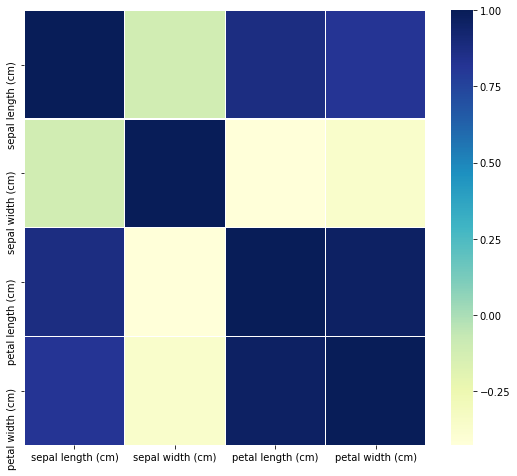

In [13]:
### Showing the correlation
corrmat = df.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [14]:
## Now creating feature vector and target variable
x = iris.data
y = iris.target

In [15]:
# scaling
x_s = preprocessing.scale(x)
y_s = preprocessing.scale(y)

In [16]:
le = preprocessing.LabelEncoder()
y_s = le.fit_transform(y_s)

In [17]:
# Train test plitting
x_train, x_test, y_train, y_test = train_test_split(x_s, y_s, test_size=0.25, random_state=4)

# KNN

In [18]:
# searching best K , k is a number between 1 and feature_len
#n = int(math.sqrt(x.shape[0]))
k_range = range(1, 30)
scores = {}
scores_list = []
max_acc_k = 1
for k in k_range:
    knn = KNNC(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores[k] = accuracy_score(y_test, y_pred)
    if scores[k] > scores[max_acc_k] :
        max_acc_k = k
    scores_list.append(accuracy_score(y_test, y_pred))

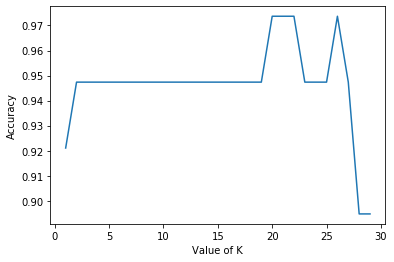

In [19]:
## Plotting the K value to accuracy score
plt.plot(k_range, scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.show()

In [20]:
### We see at k ~ 20 we are having maximum accuracy, hence it will be our k
### So create a KNN model
knn = KNNC(n_neighbors=max_acc_k)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [21]:
### evaluation
y_pred = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)

In [22]:
print(accuracy_knn)

0.9736842105263158


# Using Naive bayes

In [24]:
nb_clf = naive_bayes.GaussianNB()
nb_clf.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
# score cheking
y_pred = nb_clf.predict(x_test)
accuracy_nb = accuracy_score(y_test, y_pred)
print(accuracy_nb)

0.9736842105263158


In [26]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18  0  0]
 [ 0  8  0]
 [ 0  1 11]]


# Model comparison

In [27]:
### comparing two models

if (accuracy_knn > accuracy_nb):
    print("Knn is superior to Naive bayes in this model")
elif (accuracy_knn < accuracy_nb):
    print("Naive Bayes is superior to KNN in this model")
else:
    print("Both model performs same")

Both model performs same
